# Support Vector Machines (SVM)

In [1]:
# Die Datei polot_decision_boundaries.py muss im gleichen Verzeichnis liegen wie diese Notebook-Datei!
from plot_decision_boundaries import plot_decision_boundaries
from sklearn.svm import SVC


## Beispiel 1 mit künstlich erzeugten Daten

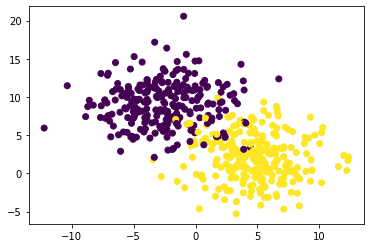

In [2]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=2, n_features=2, cluster_std=3, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\dea40349\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

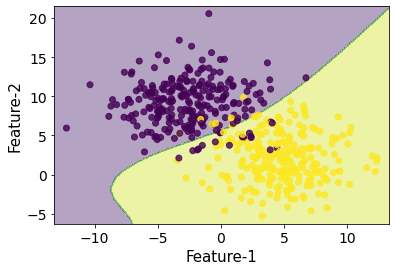

In [3]:
%matplotlib inline
plot_decision_boundaries(X, y, SVC, kernel="poly", degree=3)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, shuffle=True)
model_lin = SVC(kernel="linear").fit(X_train, y_train)
print(model_lin.score(X_test, y_test))

0.96


In [5]:
model_poly = SVC(kernel="poly", degree=3).fit(X_train, y_train)
print(model_poly.score(X_test, y_test))

0.96


## Hyperparameter
Die wichtigsten:

* **kernel**: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
* **poly**: Bei Kernel "poly" der Grad
* **C**: Regularisierungsparameter("Penalty"). Wirkt ggf. Overfitting entgegen. Hoher Wert: "Harte" Grenze, kleiner Wert: "Weiche" Grenze
* **gamma**: {‘scale’, ‘auto’} or float. Wie groß der Einfluss weiter entfernter Punkte ist. Großer Wert: Punkte mit größerem Abstand werden stärker berücksichtigt (näher liegende dafür weniger stark).

<module 'matplotlib.pyplot' from 'C:\\Users\\dea40349\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

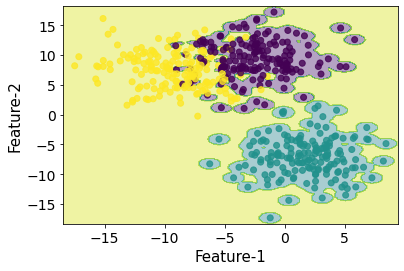

In [6]:
# Klassischer Fall von Overfitting:

X, y = make_blobs(n_samples=500, centers=3, n_features=3, cluster_std=3, random_state=42)
plot_decision_boundaries(X, y, SVC, kernel="rbf", C=10, gamma=5)

## Beispiel: Ziffernerkennung MNIST-Datensatz
Wir wollen nun mit Hilfe einer SVM handschriftlich geschriebenen Ziffern klassifizieren. Wir verwenden die K-Fold-Cross-Validation im Zusammenhang mit einer Grid-Search, um verschiedene Hyperparameter zu testen. Da die Parameter C und Gamma Fließkommazahlen sind verwenden wir hier die *RandomizedSearchCV*-Klasse.

Vor der Verwendung einer SVM sollte man die Daten standardisieren!

In [7]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits
import numpy as np

data = load_digits()
X, y = data.data, data.target

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

parameter_grid = {"kernel" : ["linear", "poly", "rbf"],
                  "degree" : [2,3,5],
                  "C": np.arange(2, 10, 2),
                  "gamma": np.arange(0.1, 2, 0.2)}


grid = RandomizedSearchCV(SVC(), param_distributions = parameter_grid, n_iter=10, scoring="accuracy",
                          n_jobs=-1, verbose=3, cv=10, random_state=42)
grid.fit(X_train, y_train)
print(grid.best_params_)

model = SVC(kernel="poly", gamma=0.3, degree=3, C=4).fit(X_train, y_train)
print(model.score(X_test, y_test))

Fitting 10 folds for each of 10 candidates, totalling 100 fits
{'kernel': 'poly', 'gamma': 0.30000000000000004, 'degree': 3, 'C': 4}
0.987037037037037
